# **MILESTONE 2**

___
**Nama**  		: Rafi Arya Siregar

**Batch** 		: HCK-028

**Obyektif**	: 
___

# **A. LATAR BELAKANG STUDY CASE**
___
Saya merupakan seorang data scientist yang ditugaskan untuk membuat model machine learning guna memprediksi potensi resign calon karyawan. Proyek ini di latar belakangi oleh tingginya laporan attrition yang diterima perusahaan selama satu tahun terakhir. Hal ini dapat berdampak pada stabilitas organisasi, seperti meningkatnya biaya rekrutmen, hilangnya pengetahuan dan pengalaman karyawan, serta penurunan moral karyawan yang bertahan. Dengan memprediksi potensi resign, perusahaan dapat mengambil langkah-langkah pencegahan, seperti meningkatkan kebijakan retensi dan kepuasan kerja, untuk menjaga kelangsungan dan kestabilan organisasi. Menggunakan framework SMART, saya dapat mengelola proyek ini agar berjalan dengan terarah. Berikut penjabaran SMART.

## **SMART FRAMEWORK**
___

**PROBLEM STATEMENT:**
Membuat model machine learning dalam waktu 3 bulan untuk memprediksi potensi resign karyawan, dengan mengukur akurasi, precision, recall, dan F1-score, guna membantu perusahaan mengidentifikasi karyawan yang berisiko resign dan meningkatkan tingkat retensi karyawan.

- **Specific**: Mengembangkan model machine learning untuk memprediksi potensi resign karyawan berdasarkan data historis perusahaan.
- **Measurable**:  Model akan dievaluasi menggunakan metrik akurasi, precision, recall, dan F1-score untuk mengukur sejauh mana model dapat memprediksi karyawan yang berisiko resign.
- **Achievable**: Menggunakan dataset yang sudah tersedia dan teknik machine learning yang sesuai (seperti regresi logistik, decision tree, atau random forest) untuk membangun model.
- **Relevant**: Model ini akan memberikan informasi penting yang dapat membantu perusahaan mengidentifikasi karyawan yang berisiko resign dan mengambil langkah-langkah pencegahan untuk meningkatkan retensi dan mengurangi biaya rekrutmen.
- **Time Bound**: Pengembangan model diharapkan selesai dalam waktu 1 bulan, dan evaluasi hasil prediksi dilakukan pada bulan keempat.

## **PENJABARAN MASALAH**
Berdasarkan	*problem statement* di atas, terdapat tujuh poin permasalahan yang saya angkat:

1. Bagaimana distribusi usia karyawan yang mengalami attrition dibandingkan dengan yang tidak?
2. Apakah terdapat signifikansi tingkat kepuasan kerja antara karyawan yang bertahan dan yang keluar?
3. Bagaimana persebaran lama bekerja karyawan dengan peluang memimpin divisi?
4. Apakah ada perbedaan dalam tingkat attrition berdasarkan departemen atau peran pekerjaan?
5. Sejauh mana faktor-faktor seperti jarak dari rumah ke tempat kerja mempengaruhi keputusan karyawan untuk bertahan?
6. Bagaimana hubungan antara gaji bulanan dan tingkat attrition?
7. Apakah terdapat hubungan antara pendapatan karyawan pada level pendidikan tertentu terhadap attrition?

## **JUSTIFIKASI PERMASALAHAN**
___ 

Permasalahan attrition karyawan atau yang biasa disebut dengan *resign* berpengaruh terhadap keberlanjutan perusahaan. Kepuasan kinerja karyawan berpengaruh terhadap pengunduruan diri karyawan. [**Artikel**](https://eprints.uniska-bjm.ac.id/8005/1/ARTIKEL%20RATNA%20SARI%20FIX.pdf) yang dikemukakan oleh Sari, et al.,   menekankan bahwa terdapat beberapa variabel yang mempengaruhi, antara lain adalah faktor kepuasan kerja yang dipengaruhi oleh gaji, prospek karir, dan kinerja. Menggunakan dataset [**Employee Attrition Classification Dataset**](https://www.kaggle.com/datasets/stealthtechnologies/employee-attrition-dataset), saya dapat melakukan eksplorasi analissi lebih dalam untuk membuat sebuah model machine learning yang optimal dalam memprediksi.

# **B. IMPORT LIBRARIES**
___
Mengimport beberapa library yang digunakan untuk proses pengolahan data, perhitungan statistika, proses modeling, dan proses evaluasi model.

In [1]:
# Data Manipulation
import pandas as pd  # Untuk manipulasi data
import numpy as np
from scipy import stats

# Visualisasi Data
import matplotlib.pyplot as plt  # Visualisasi data menggunakan matplotlib
import seaborn as sns  # Visualisasi data menggunakan seaborn

# EDA (Exploratory Data Analysis)
import eda_package as ep  # Mengimpor package EDA kustom yang dibuat sendiri

# Model Evaluation Metrics
from sklearn.metrics import silhouette_score, silhouette_samples  # Untuk evaluasi clustering

# Imputasi Data
from sklearn.impute import KNNImputer  # Menggunakan KNN untuk imputasi missing values

# Data Preprocessing and Transformation
from sklearn.pipeline import Pipeline  # Untuk membuat pipeline model
from sklearn.compose import ColumnTransformer  # Untuk melakukan transformasi pada data berdasarkan kolom
from sklearn.preprocessing import RobustScaler, StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder  # Preprocessing

from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score

# Model Algorithm
import pickle  # Untuk menyimpan dan memuat model

# Splitting train & test data
from sklearn.model_selection import train_test_split

# Model Algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Feature Engineering - Outlier Handling
from feature_engine.outliers import Winsorizer

# Model Evaluation Metrics
from sklearn.metrics import accuracy_score, recall_score, f1_score

# Model Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform  # Untuk distribusi random search

import prince
	
# Disable all warnings
import warnings
warnings.filterwarnings('ignore')


# **C. DATA LOADING**
___
Mempersiapkan dataset untuk keperluan EDA dan Modeling pada tahap-tahap selanjutnya dengan mengidentifikasi dan menangani informasi struktur data berupa baris, kolom, missing values, duplicated values, tipe data dan konsistensi data yang dikelola. 

In [2]:
# Melakukan import dataset_2.csv ke dataframe data.
dataset = pd.read_csv('P1M2_rafi_siregar.csv')
dataset.columns = dataset.columns.str.strip().str.replace(r'[\s,-]+', '_', regex=True)
head = dataset.head(10)
tail = dataset.tail(10)

# Menampilkan top 10 ascending dan descending data sebanyak 10 query
print('--- Top 10 Dataset Ascending ---')
display(head)
print('\n--- Top 10 Dataset Descending ---')
display(tail)

--- Top 10 Dataset Ascending ---


,Employee_ID,Age,Gender,Years_at_Company,Job_Role,Monthly_Income,Work_Life_Balance,Job_Satisfaction,Performance_Rating,Number_of_Promotions,...,Number_of_Dependents,Job_Level,Company_Size,Company_Tenure,Remote_Work,Leadership_Opportunities,Innovation_Opportunities,Company_Reputation,Employee_Recognition,Attrition
0,52685,36,Male,13,Healthcare,8029,Excellent,High,Average,1,...,1,Mid,Large,22,No,No,No,Poor,Medium,Stayed
1,30585,35,Male,7,Education,4563,Good,High,Average,1,...,4,Entry,Medium,27,No,No,No,Good,High,Left
2,54656,50,Male,7,Education,5583,Fair,High,Average,3,...,2,Senior,Medium,76,No,No,Yes,Good,Low,Stayed
3,33442,58,Male,44,Media,5525,Fair,Very High,High,0,...,4,Entry,Medium,96,No,No,No,Poor,Low,Left
4,15667,39,Male,24,Education,4604,Good,High,Average,0,...,6,Mid,Large,45,Yes,No,No,Good,High,Stayed
5,3496,45,Female,30,Healthcare,8104,Fair,High,Average,0,...,0,Senior,Large,75,No,No,No,Good,Low,Stayed
6,46775,22,Female,5,Healthcare,8700,Good,High,Average,0,...,0,Mid,Small,48,No,No,No,Poor,High,Stayed
7,72645,34,Female,15,Technology,11025,Fair,Medium,High,1,...,4,Entry,Large,16,No,No,No,Good,Low,Left
8,4941,48,Female,40,Technology,11452,Good,Medium,Below Average,0,...,1,Mid,Large,52,No,No,No,Good,Medium,Stayed
9,65181,55,Female,16,Media,5939,Poor,High,Average,0,...,1,Entry,Small,46,No,No,No,Good,High,Stayed



--- Top 10 Dataset Descending ---


,Employee_ID,Age,Gender,Years_at_Company,Job_Role,Monthly_Income,Work_Life_Balance,Job_Satisfaction,Performance_Rating,Number_of_Promotions,...,Number_of_Dependents,Job_Level,Company_Size,Company_Tenure,Remote_Work,Leadership_Opportunities,Innovation_Opportunities,Company_Reputation,Employee_Recognition,Attrition
74488,67222,49,Male,28,Technology,6533,Fair,Medium,High,1,...,4,Entry,Medium,93,No,No,No,Good,Medium,Left
74489,41091,18,Male,5,Healthcare,9563,Good,Low,Average,0,...,4,Entry,Large,23,No,No,No,Poor,Medium,Left
74490,16024,23,Male,10,Healthcare,8143,Fair,High,Average,0,...,1,Mid,Small,73,No,No,No,Fair,Medium,Left
74491,60264,42,Male,10,Technology,10727,Good,High,Average,0,...,1,Mid,Small,73,No,No,No,Fair,High,Left
74492,44132,38,Male,23,Finance,10351,Excellent,Medium,Below Average,2,...,4,Entry,Small,54,No,No,No,Poor,Medium,Stayed
74493,37195,50,Female,12,Education,4414,Fair,High,Average,1,...,2,Senior,Small,35,No,No,Yes,Poor,Very High,Left
74494,6266,18,Male,4,Healthcare,8040,Fair,High,High,3,...,0,Senior,Medium,73,No,No,No,Fair,Medium,Left
74495,54887,22,Female,14,Technology,7944,Fair,High,High,0,...,2,Entry,Small,29,No,Yes,No,Good,Medium,Stayed
74496,861,23,Male,8,Education,2931,Fair,Very High,Average,0,...,0,Entry,Large,9,No,No,No,Good,Low,Left
74497,15796,56,Male,19,Technology,6660,Good,High,Average,0,...,3,Mid,Medium,81,No,No,No,Good,Low,Stayed


**Berikut adalah keterangan dari dari setiap value kolom:**

| **Atribut Tabel**            | **Penjelasan**                                                                                                      |
| ---------------------------- | ------------------------------------------------------------------------------------------------------------------- |
| **Employee ID**              | ID unik yang diberikan kepada setiap karyawan.                                                                      |
| **Age**                      | Umur karyawan, biasanya dalam tahun.                                                                                |
| **Gender**                   | Jenis kelamin karyawan (Laki-laki atau Perempuan).                                                                  |
| **Years at Company**         | Jumlah tahun yang telah dihabiskan karyawan di perusahaan.                                                          |
| **Monthly Income**           | Pendapatan bulanan karyawan dalam dolar.                                                                            |
| **Job Role**                 | Peran atau jabatan pekerjaan yang dijalani karyawan dalam perusahaan.                                               |
| **Work-Life Balance**        | Penilaian terhadap keseimbangan antara pekerjaan dan kehidupan pribadi karyawan.                                    |
| **Job Satisfaction**         | Tingkat kepuasan karyawan terhadap pekerjaan mereka.                                                                |
| **Performance Rating**       | Penilaian kinerja karyawan oleh perusahaan, bisa berupa rating atau skor evaluasi.                                  |
| **Overtime**                 | Status apakah karyawan bekerja lembur (Yes/No).                                                                     |
| **Number of Promotions**     | Jumlah promosi yang telah diterima oleh karyawan dalam perusahaan.                                                  |
| **Distance from Home**       | Jarak antara tempat tinggal karyawan dengan tempat kerja dalam mil.                                                 |
| **Education Level**          | Tingkat pendidikan terakhir yang dicapai oleh karyawan.                                                             |
| **Marital Status**           | Status pernikahan karyawan (Menikah, Belum Menikah, atau lainnya).                                                  |
| **Number of Dependents**     | Jumlah tanggungan yang dimiliki oleh karyawan (misalnya, anak atau anggota keluarga lainnya).                      |
| **Job Level**                | Tingkatan jabatan karyawan di perusahaan (misalnya, level manajer, supervisor, dll.).                               |
| **Company Size**             | Ukuran perusahaan, yang mungkin mencakup jumlah karyawan atau pendapatan perusahaan.                                |
| **Company Tenure**           | Masa kerja karyawan dalam perusahaan, diukur dalam tahun.                                                           |
| **Remote Work**              | Apakah karyawan bekerja dari jarak jauh (remote) atau bekerja di kantor.                                            |
| **Leadership Opportunities** | Kesempatan yang diberikan perusahaan kepada karyawan untuk berperan dalam kepemimpinan.                             |
| **Innovation Opportunities** | Kesempatan bagi karyawan untuk berpartisipasi dalam inovasi atau pengembangan ide baru.                             |
| **Company Reputation**       | Reputasi perusahaan di mata karyawan atau publik.                                                                   |
| **Employee Recognition**     | Penghargaan atau pengakuan yang diberikan kepada karyawan atas pencapaian atau kontribusi mereka.                   |
| **Attrition**                | Status apakah karyawan tetap bekerja di perusahaan atau mengundurkan diri (attrisi berarti keluar dari perusahaan). |

In [3]:
ep.data_explore(dataset)

=== Info DataFrame ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74498 entries, 0 to 74497
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Employee_ID               74498 non-null  int64 
 1   Age                       74498 non-null  int64 
 2   Gender                    74498 non-null  object
 3   Years_at_Company          74498 non-null  int64 
 4   Job_Role                  74498 non-null  object
 5   Monthly_Income            74498 non-null  int64 
 6   Work_Life_Balance         74498 non-null  object
 7   Job_Satisfaction          74498 non-null  object
 8   Performance_Rating        74498 non-null  object
 9   Number_of_Promotions      74498 non-null  int64 
 10  Overtime                  74498 non-null  object
 11  Distance_from_Home        74498 non-null  int64 
 12  Education_Level           74498 non-null  object
 13  Marital_Status            74498 non-null  object
 14 

,Kolom,Jumlah Missing Value,Jumlah Nilai Unik,Item Unik
0,Employee_ID,0 (0.00%),74498,"[52685, 30585, 54656, 33442, 15667, 3496, 4677..."
1,Age,0 (0.00%),42,"[36, 35, 50, 58, 39, 45, 22, 34, 48, 55, 32, 2..."
2,Gender,0 (0.00%),2,"[Male, Female]"
3,Years_at_Company,0 (0.00%),51,"[13, 7, 44, 24, 30, 5, 15, 40, 16, 12, 3, 14, ..."
4,Job_Role,0 (0.00%),5,"[Healthcare, Education, Media, Technology, Fin..."
5,Monthly_Income,0 (0.00%),9842,"[8029, 4563, 5583, 5525, 4604, 8104, 8700, 110..."
6,Work_Life_Balance,0 (0.00%),4,"[Excellent, Good, Fair, Poor]"
7,Job_Satisfaction,0 (0.00%),4,"[High, Very High, Medium, Low]"
8,Performance_Rating,0 (0.00%),4,"[Average, High, Below Average, Low]"
9,Number_of_Promotions,0 (0.00%),5,"[1, 3, 0, 2, 4]"



=== Duplicate Value & Total Rows ===


,Kategori,Jumlah,Persentase
0,Jumlah Duplicate Rows,0,0.0
1,Jumlah Total Baris,74498,100.0


Terdapat beberapa insight yang dapat diperoleh dari dataset ini:
- Terdapat 74.498 baris dan 24 kolom
- Tidak terdapat data duplikat dan missing data
- Data siap untuk dilakukan proses EDA dan modeling.

# **D. EXPLORATORY DATA ANALYSIS**
___
Melakukan kegiatan analisis terhadap datasdet **[P1M2_rafi_siregar.csv](P1M2_rafi_siregar.csv)** dengan melakukan perhitungan statistika deskriptif dan inferensial untuk merepresentasikan insight-insight yang diperoleh dari data.

## **1. Bagaimana persebearan usia karyawan yang mengalami attrition dibandingkan dengan yang tidak?**

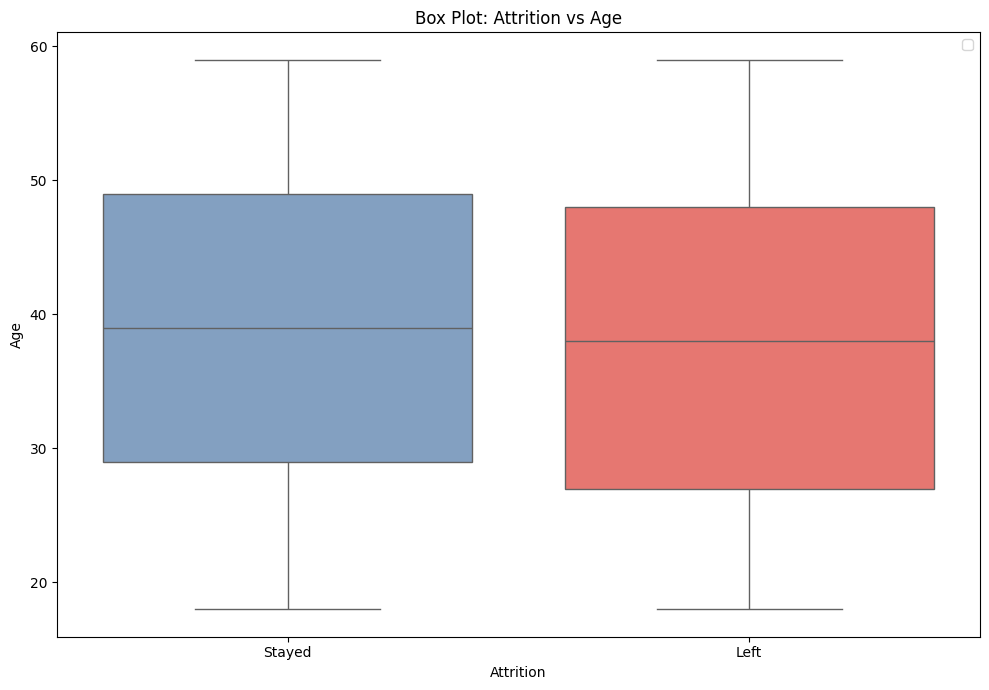

In [4]:
warna = {'Stayed': '#799FCB', 'Left': '#F9665E'}
ep.plot_relationship(dataset, 'Attrition', ['Age'], kind='box', custom_colors=warna)

Berdasarkan boxplot di atas, terlihat bahwa persebaran karyawan yang memutuskan untuk resign berada pada rentang umur yang cenderung lebih muda. Mayoritas karyawan yang memutuskan untuk resign dan bertahan ada pada rentang dibawah umur 30 dan dibawah umur 50, dimana secara spesifik karyawan yang yang bertahan ada pada rentang umur yang lebih tua 1 tahun sampai 2 tahun.

## **2. Apakah terdapat signifikansi tingkat kepuasan kerja antara karyawan yang bertahan dan yang keluar?**

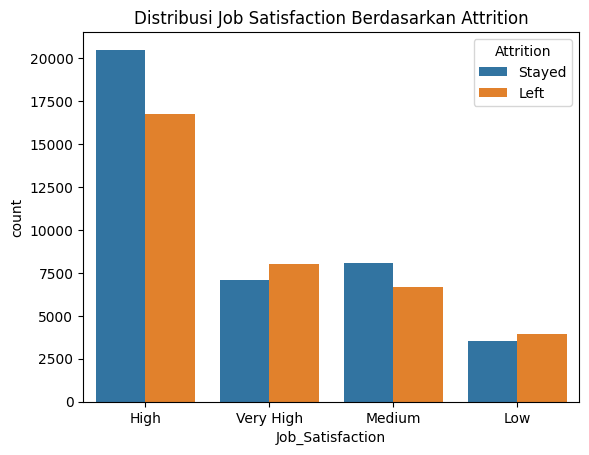


Analisis Korelasi terhadap target ===> 'Attrition'

Tidak ada kolom numerik untuk analisis Point-Biserial.

=== Hasil Chi-Square Analysis ===
            Feature     Chi2  p_value Significance
0  Job_Satisfaction  388.237      0.0   Signifikan

=== Hipotesis yang Diberikan ===
H0: Tidak terdapat signifikansi tingkat kepuasan kerja antara karyawan yang bertahan dan yang keluar
H1: Terdapat signifikansi tingkat kepuasan kerja antara karyawan yang bertahan dan yang keluar

Kesimpulan: Ada hubungan antara Attrition dan Job_Satisfaction


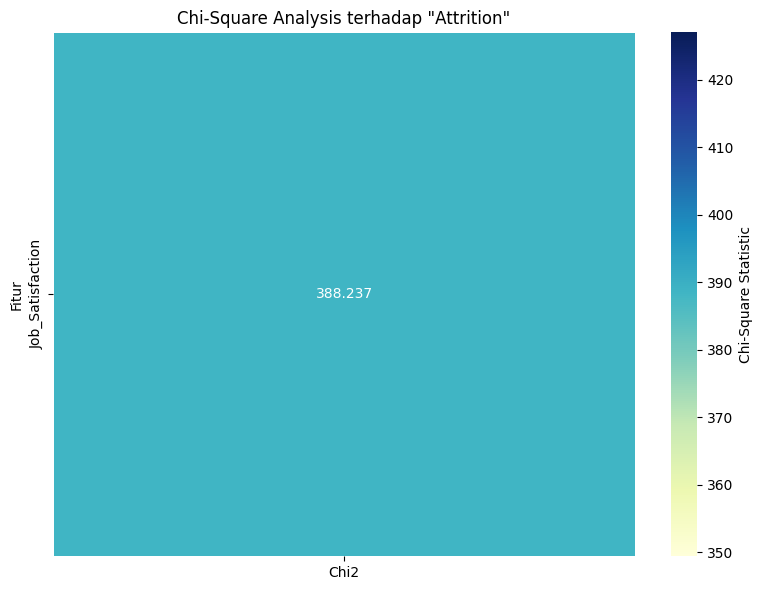

In [5]:
# Plotting the countplot
sns.countplot(data=dataset, x='Job_Satisfaction', hue='Attrition')
plt.title('Distribusi Job Satisfaction Berdasarkan Attrition')
plt.show()

# Selecting the relevant columns into a new DataFrame
attjob = dataset[['Attrition', 'Job_Satisfaction']]

# Perform correlation analysis
# Ensure that the 'ep' object has the method 'correlation_analysis_binary'
ep.correlation_analysis_binary(attjob, 'Attrition', 
                               h0='Tidak terdapat signifikansi tingkat kepuasan kerja antara karyawan yang bertahan dan yang keluar',
                               h1='Terdapat signifikansi tingkat kepuasan kerja antara karyawan yang bertahan dan yang keluar')

Persebaran data terhadap kepuasan kerja karyawan yang resign dan bertahan didominasi pada karyawan yang memiliki **tingkat kepuasan tinggi** (High). Lalu jika kita melihat hasil pengujian Chi-Square, terdapat hubungan yang sangat kuat dengan nilai sebesar **338** dan memiliki hasil yang sangat signifikan pada batas threshold nilai alpha sebesar 0.05.

## **3. Bagaimana persebaran lama bekerja karyawan dengan peluang memimpin divisi?**

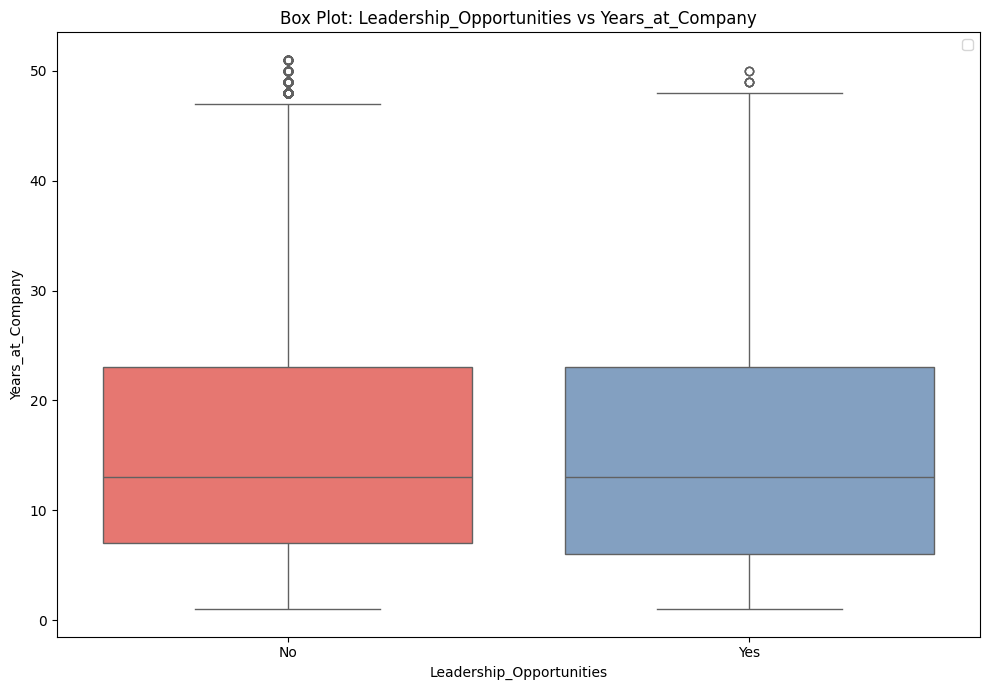

In [6]:
warna1 = {'Yes': '#799FCB', 'No': '#F9665E'}
ep.plot_relationship(dataset, 'Leadership_Opportunities', target_cols=['Years_at_Company'], kind='box', custom_colors=warna1)

Berdasarkan distribusi pada grafik boxplot di atas, karyawan yang tidak memiliki peluang kepemimpinan didominasi oleh karyawan yang lebih lama bekerja di perusahaan, yang juga ditandai oleh data outlier yang lebih tinggi. Sedangkan karyawan yang memiliki peluang kepemimpinan memiliki rentang yang lebih konsisten dan lebih rendah umur bekerjanya, walaupun terdapat beberapa nilai outlier positif yang terdeteksi.

## **4. Apakah ada perbedaan dalam tingkat attrition berdasarkan departemen atau peran pekerjaan?**

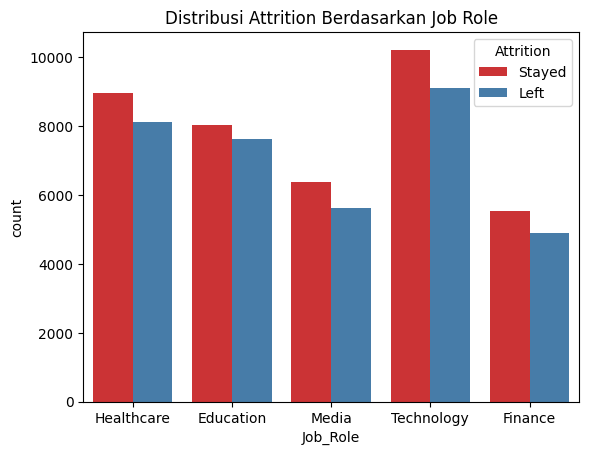

In [7]:
sns.countplot(data=dataset, x='Job_Role', hue='Attrition', palette='Set1')
plt.title('Distribusi Attrition Berdasarkan Job Role')
plt.show()


Data di atas menunjukan distribusi karyawan yang resign dan bertahan pada berbagai departemen. Persebaran karyawan yang memilih untuk resign dan bertahan di perusahaan paling besar pada departemen **Technology**. Maka dari itu, hal ini mengindikasikan bahwa karyawan pada departemen mungkin dipengaruhi oleh variabel latar belakang kemungkinan tidak dipengaruhi oleh variabel teknis seperti latar belakang pendidikan atau  

## **5. Sejauh mana faktor jarak dari rumah ke tempat kerja mempengaruhi keputusan karyawan untuk bertahan?**

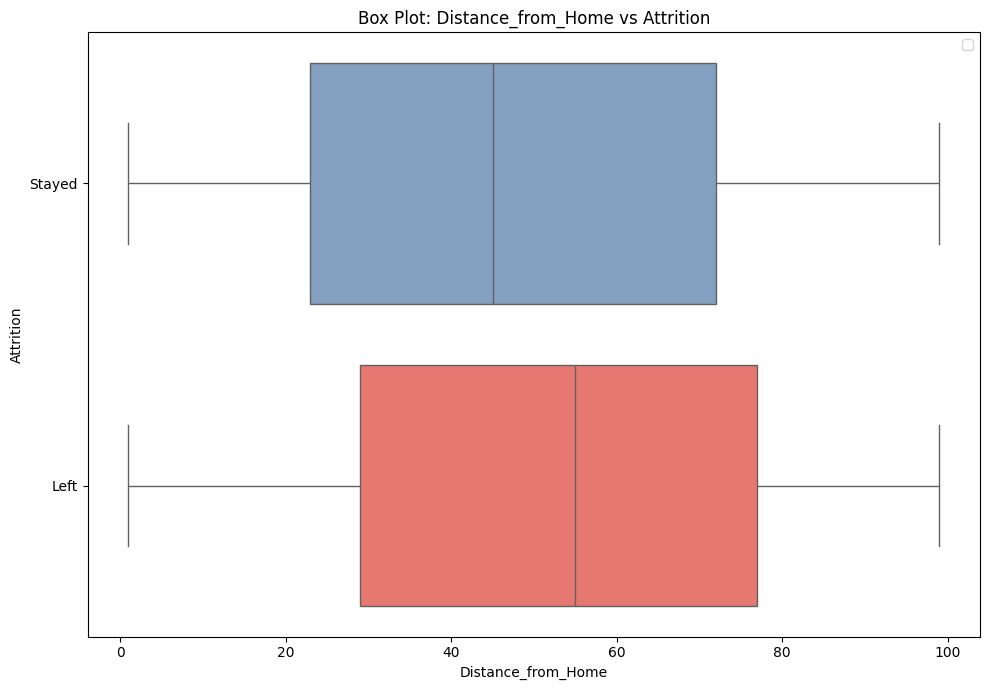


Analisis Korelasi terhadap target ===> 'Attrition'

=== Hasil Point-Biserial Correlation ===
              Feature   r_pb  p_value Significance
0  Distance_from_Home  0.094      0.0   Signifikan

H0: Tidak ada hubungan antara Attrition dan Distance_from_Home.
H1: Ada hubungan antara Attrition dan Distance_from_Home.

Kesimpulan: Ada hubungan antara Attrition dan Distance_from_Home


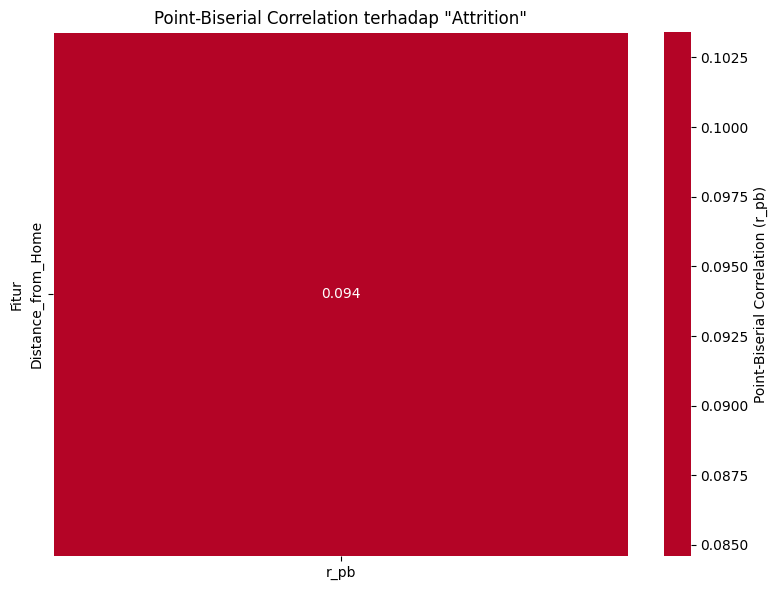


Tidak ada kolom kategorikal untuk analisis Chi-Square.


In [8]:
warna2 = {'Stayed': '#799FCB', 'Left': '#F9665E'}
ep.plot_relationship(dataset, 'Distance_from_Home', target_cols=['Attrition'], kind='box', custom_colors=warna2)

# Membuat salinan dataset dan memetakan nilai 'Attrition' menjadi 1 (Left) dan 0 (Stayed)
dhmatt = dataset.copy()
dhmatt['Attrition'] = dhmatt['Attrition'].map({'Left': 1, 'Stayed': 0})

# Membuat DataFrame yang berisi kolom yang akan dianalisis
df_dhmatt = dhmatt[['Attrition', 'Distance_from_Home']]

# Menjalankan analisis korelasi biner menggunakan fungsi yang telah ada
ep.correlation_analysis_binary(df_dhmatt, 'Attrition')

Grafik boxplot di atas menunjukan bahwa jarak bepergian bukanlah faktor yang membedakan antara karyawan yang resign dan bertahan. Kedua kelompok memiliki jarak yang hampir sama, dengan kelompok karyawan resign memiliki jarak tempuh yang lebih beragam. Lebih lanjut, jika melakukan perhitungan uji statistik menggunakan Point-Bisserial, terdapat korelasi yang cukup kecil sebesar **0.09 secara positif**. Di sisi lain hasil p-value menunjukan hasil signifikansi yang kuat. Maka dari itu, saya berasumsi bahwa jarak bepergian bukan faktor utama dalam menentukan karyawan untuk resign atau bertahan di perusahaan.

## **6. Bagaimana hubungan antara gaji bulanan dan tingkat attrition?**

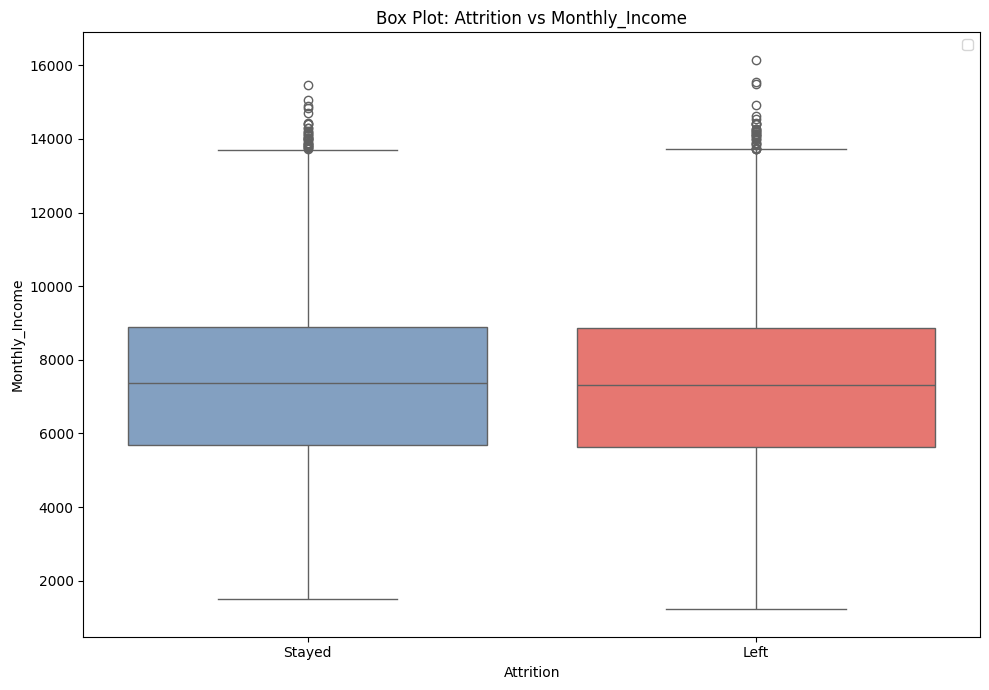


Analisis Korelasi terhadap target ===> 'Attrition'

=== Hasil Point-Biserial Correlation ===
          Feature   r_pb   p_value Significance
0  Monthly_Income -0.011  0.003533   Signifikan

H0: Tidak ada hubungan antara Attrition dan Monthly_Income.
H1: Ada hubungan antara Attrition dan Monthly_Income.

Kesimpulan: Ada hubungan antara Attrition dan Monthly_Income


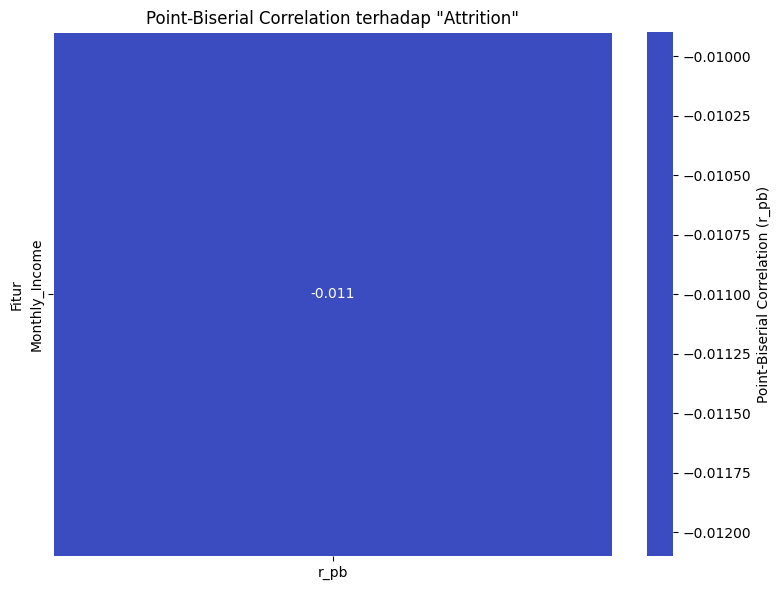


Tidak ada kolom kategorikal untuk analisis Chi-Square.


In [9]:
warna3 = {'Stayed': '#799FCB', 'Left': '#F9665E'}
ep.plot_relationship(dataset, 'Attrition', target_cols=['Monthly_Income'], kind='box', custom_colors=warna3)

# Membuat salinan dataset dan memetakan nilai 'Attrition' menjadi 1 (Left) dan 0 (Stayed)
attmon1 = dataset.copy()
attmon1['Attrition'] = attmon1['Attrition'].map({'Left': 1, 'Stayed': 0})

# Membuat DataFrame yang berisi kolom yang akan dianalisis
attmonfin = attmon1[['Attrition', 'Monthly_Income']]

# Menjalankan analisis korelasi biner menggunakan fungsi yang telah ada
ep.correlation_analysis_binary(attmonfin, target_col='Attrition', show=True)

Hasil distribusi boxplot menunjukan karyawan yang resign memiliki rentang gaji yang lebih besar, sementara karyawan yang bertahan memiliki perebaran yang lebih stabil dengan rentang gaji yang lebih rendah. Namun, kita dapat melihat bahwa persebaran karyawan dengan gaji sangat tinggi yang tergolong outlier berada pada kelompok resign. Jika melihat situasi nyata, besarnya gaji seseorang seharusnya menjadi variabel penting seorang karyawan dalam bekerja secara profesional. Maka dari itu, kita perlu melakukan uji statistik untuk menentukan apakah asumsi kita valid atau tidak.

Berdasarkan hasil perhitungan korelasi antara Monthly Income dan Attrition menggunakan rumus Point-Bisserial, faktor gaji memeiliki **korelasi yang sangat kecil** secara negatif, **namun memiliki signifikansi hubungan antar kedua variabel**. Hasil uji ini menjelaskan asumsi saya lebih lanjut, bahwa kemungkinan besar variabel gaji karyawan **bukan faktor utama** dalam menentukan karyawan yang akan resign atau bertahan.  

## **7. Apakah terdapat hubungan antara pendapatan karyawan pada level pendidikan tertentu terhadap attrition?**

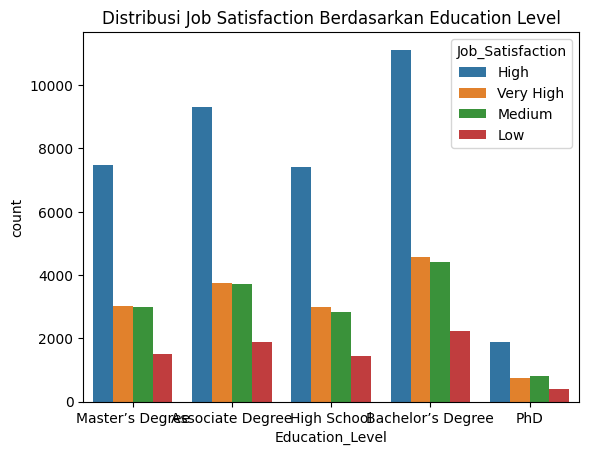

Uji Chi-square untuk Education Level dan Job Satisfaction: chi2 = 7.77912547772618, p-value = 0.8021440245380195


In [10]:
# Plot distribusi Job Satisfaction berdasarkan Education Level
sns.countplot(data=dataset, x='Education_Level', hue='Job_Satisfaction')
plt.title('Distribusi Job Satisfaction Berdasarkan Education Level')
plt.show()

# Uji Chi-square untuk Job Satisfaction dan Education Level
contingency_table = pd.crosstab(dataset['Education_Level'], dataset['Job_Satisfaction'])
chi2, p_val, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Uji Chi-square untuk Education Level dan Job Satisfaction: chi2 = {chi2}, p-value = {p_val}")


Secara umum, karyawan berlatar belakang Magister dan PHD memeiliki tingkat kepuasan kerja yang tinggi, terlihat pada variasi kepuasan yang lebih besar. Namun jika melihat pada karyawan dengan latar belakang lulusan Sekolah Menengah Atas (SMA), kita bisa mengidentifikasi kecenderungan yang lebih rendah dalam tingkat kepuasan kerja. Saya berasumsi bahwa tantangan pekerjaan pada karyawan lulusan SMA lebih terbatas untuk kemajuan karier mereka. 

Menggunakan perhitungan Chi-Square, hubungan antara variabel Job Satisfaction dan Education Level memiliki hubungan yang cukup besar secara statistik dan memiliki signifikansi antara tingkat kepuasan bekerja dengan latar belakang karyawan.

# **E. FEATURE ENGINEERING**
___
Melakukan persiapan data untuk proses modeling. Tahapan ini akan membagi data feature-target, membagi train-test, membagi data numerik-kategorikal, identifikasi kardinalitas fitur, menseleksi fitur yang digunakan, melakukan pre-processing data dengan handling outlier, imputing data, dan transformasi menggunakan pipeline.

Mengecualikan kolom identifier sebelum melakukan proses modeling. Hal ini dikarenakan identifier merupaan nilai yang sangat unik dan tidak berhubungan terhadap prediksi Attrition.

In [11]:
# Menggunakan method copy() untuk menduplikasi dataset pada object dm.
dm = dataset.copy()
dm = dm.drop(['Employee_ID'], axis=1) # drop Identifier

## **I. Split Feature & Target**
Melakukan split data antara feature dengan target. Target yang di tetapkan adalah variabel repeat order berdasarkan kolom ``will_buy_on_return_visit`` sebagai variabel dependen, sedangkan features adalah keseluruhan kolom berdasarkan variabel independen.

Melakukan splitting data fitur dan target.

In [12]:
#Splitting antara X dan y

X = dm.drop(['Attrition'], axis=1) # features
y = dm['Attrition'] # target

tampilinx1= X.head(5) 
tampiliny1= y.head(5) 

# Menampilkan top 5 data
display(tampilinx1) 
display(tampiliny1) 

,Age,Gender,Years_at_Company,Job_Role,Monthly_Income,Work_Life_Balance,Job_Satisfaction,Performance_Rating,Number_of_Promotions,Overtime,...,Marital_Status,Number_of_Dependents,Job_Level,Company_Size,Company_Tenure,Remote_Work,Leadership_Opportunities,Innovation_Opportunities,Company_Reputation,Employee_Recognition
0,36,Male,13,Healthcare,8029,Excellent,High,Average,1,Yes,...,Married,1,Mid,Large,22,No,No,No,Poor,Medium
1,35,Male,7,Education,4563,Good,High,Average,1,Yes,...,Single,4,Entry,Medium,27,No,No,No,Good,High
2,50,Male,7,Education,5583,Fair,High,Average,3,Yes,...,Divorced,2,Senior,Medium,76,No,No,Yes,Good,Low
3,58,Male,44,Media,5525,Fair,Very High,High,0,Yes,...,Single,4,Entry,Medium,96,No,No,No,Poor,Low
4,39,Male,24,Education,4604,Good,High,Average,0,Yes,...,Married,6,Mid,Large,45,Yes,No,No,Good,High


0    Stayed
1      Left
2    Stayed
3      Left
4    Stayed
Name: Attrition, dtype: object

Menampilkan persentase data target `Attrition`.

,Nilai,Jumlah,Persentase (%)
0,Stayed,39128,52.522215
1,Left,35370,47.477785


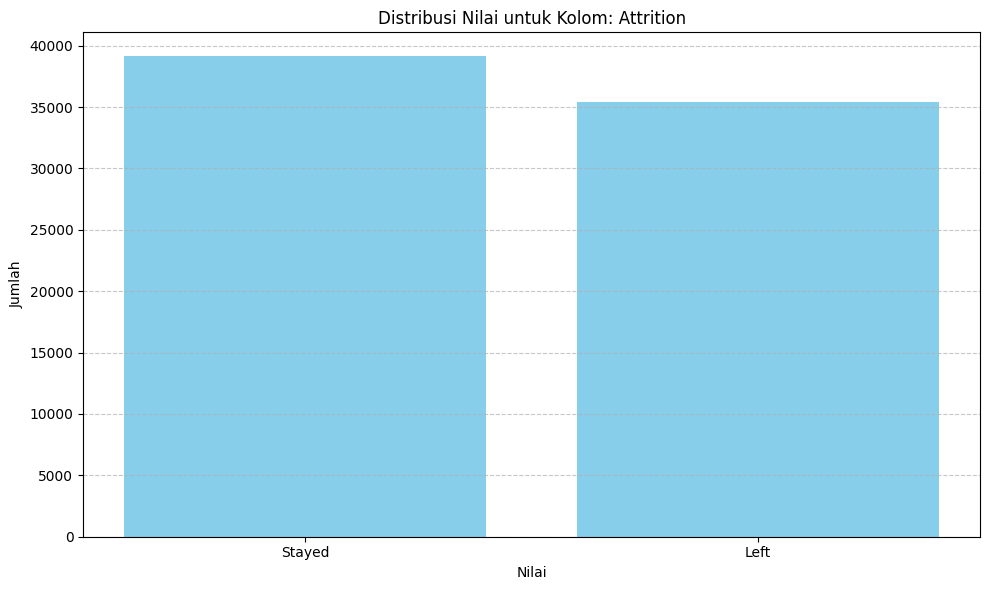

In [13]:
ep.calculate_value_percentage(dm, 'Attrition', plot=True)

In [14]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)
# Balikkan hasil encoding (terbalikkan 0 dan 1)
y = 1 - y

y = pd.DataFrame(y)
y

,0
0,0
1,1
2,0
3,1
4,0
...,...
74493,1
74494,1
74495,0
74496,1


Persebaran data target antara karyawan yang bertahan dan resign cukup seimbang, sebesar 52% pada data **Stayed** dan 47% pada data **Left**. Maka kita tidak perlu melakukan proses data balancing pada proses modeling. Namun, perlu kita perhatikan proses evaluasi modeling, dimana metrik **recall** menjadi faktor penilaian paling penting dalam mengidentifikasi karyawan yang sungguh-sungguh akan melakukan resign.

## **II. Split Data Train & Data Test**
Melakukan splitting data antara tipe data numerik dan tipe data kategori pada train set dan test set.

In [15]:
#Splitting training & testing set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)

print('Train Size   :', X_train.shape)
print('Test Size	:', X_test.shape)

Train Size   : (59598, 22)
Test Size	: (14900, 22)


Penejelasan:
- Terdapat 59.598 baris data train dan 14.900 data test, dengan menggunakan 22 fitur.
- Train dan test memiliki porsi sebesar 80% - 20%. Porsi ini umum digunakan dalam proses modeling.
- Menggunakan random state sebesar 42 agar pembagian porsi data train dan data test sama pada setiap menjalankan kode program.
- Menggunakan stratify pada data kedua target agar memiliki porsi yang sama.

## **III. Split Data Numerik & Data Kategorikal**
<!-- Memisahkan data kategorikal dan numerik. Berdasarkan hasil EDA pada Bab C, perlu mendefinisikan fitur``bounces`` dan ``latest_ecommerce_progress`` sebagai fitur kategorikal. Maka saya melakukan splitting data numerik dan kategorikan serta data kategorikal yang tidak akan dilakukan proses transformasi. -->

Mendefinisikan data numerik dan data kategorikal.

In [16]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74498 entries, 0 to 74497
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       74498 non-null  int64 
 1   Gender                    74498 non-null  object
 2   Years_at_Company          74498 non-null  int64 
 3   Job_Role                  74498 non-null  object
 4   Monthly_Income            74498 non-null  int64 
 5   Work_Life_Balance         74498 non-null  object
 6   Job_Satisfaction          74498 non-null  object
 7   Performance_Rating        74498 non-null  object
 8   Number_of_Promotions      74498 non-null  int64 
 9   Overtime                  74498 non-null  object
 10  Distance_from_Home        74498 non-null  int64 
 11  Education_Level           74498 non-null  object
 12  Marital_Status            74498 non-null  object
 13  Number_of_Dependents      74498 non-null  int64 
 14  Job_Level             

Berdasarkan informasi data train di atas dan juga saat melakukan proses Data Loading, saya menemukan bahwa terdapat beberapa data numerik dan data kategorikal yang perlu didefinisikan ulang. Saya mengidentifikasi setidaknya ada tiga fitur yang perlu diperhatikan:
- Kolom **identifier** (Employee_ID) harus dikecualikan karena secara logis tidak berpengaruh terhadap prediksi karyawan yang akan melakukan resign.
- Fitur **Number_of_Promotions** dan **Number_of_Dependents** tergolong numerik karena bertipe data integer. Namun jika kita analisa lebih dalam, kedua kolom merupakan sebuah frekuensi yang bersifat ordinal dan tidak mencerimkan variabel yang dapat dihitung secara kontinu dikarenakan setiap karyawan memiliki tanggungan atau tanggung jawab yang berbeda. Maka dari itu, kedua kolom dapat terdefinisikan sebagai individu yang unik. Jika kita ingin menilai kedua kolom tersebut sebagai kolom numerik, maka kita perlu menganggregasi variabel lain terhadap kedua kolom tersebut. Maka saya akan mendefinisikan kedua kolom sebagai fitur kategorikal yang akan di *passthrough* yang tidak perlu dilakukan encoding karena datanya sudah terdefinisikan sebagai data ordinal.
- Fitur numerik dan kategorikal akan digolongkan dengan mengidentifikasi kolom object dan kolom integer atau float. 

In [17]:
# Menentukan fitur kategorikal dan numerikal
cat_feat = list(X.select_dtypes(include='object').columns)
passt =['Number_of_Promotions', 'Number_of_Dependents']
num_feat = [col for col in X.select_dtypes(exclude='object').columns if col not in passt]

# Cek fitur kategorik
listItemCF1 = []
for col in cat_feat:
    listItemCF1.append([col, X[col].nunique(), X[col].unique()])

# Cek fitur numerik (yang akan diproses)
listItemNF1 = []
for col in num_feat:
    listItemNF1.append([col, X[col].nunique(), X[col].unique()])

# # Cek fitur numerik-pass (yang bentuknya string angka, tapi ingin dipertahankan)
listItemCP = []
for col in passt:
    listItemCP.append([col, X[col].nunique(), X[col].unique()])

# Buat DataFrame hasil
dataCF = pd.DataFrame(columns=['Features Category (CF)', 'Jumlah', 'Unique CF'], data=listItemCF1)
dataNF = pd.DataFrame(columns=['Features Numeric (NF)', 'Jumlah', 'Unique NF'], data=listItemNF1)
dataP = pd.DataFrame(columns=['Features Category - Passthrough', 'Jumlah', 'Unique'], data=listItemCP)

# Tampilkan
display(dataCF)
display(dataNF)
display(dataP)


,Features Category (CF),Jumlah,Unique CF
0,Gender,2,"[Male, Female]"
1,Job_Role,5,"[Healthcare, Education, Media, Technology, Fin..."
2,Work_Life_Balance,4,"[Excellent, Good, Fair, Poor]"
3,Job_Satisfaction,4,"[High, Very High, Medium, Low]"
4,Performance_Rating,4,"[Average, High, Below Average, Low]"
5,Overtime,2,"[Yes, No]"
6,Education_Level,5,"[Master’s Degree, Associate Degree, High Schoo..."
7,Marital_Status,3,"[Married, Single, Divorced]"
8,Job_Level,3,"[Mid, Entry, Senior]"
9,Company_Size,3,"[Large, Medium, Small]"


,Features Numeric (NF),Jumlah,Unique NF
0,Age,42,"[36, 35, 50, 58, 39, 45, 22, 34, 48, 55, 32, 2..."
1,Years_at_Company,51,"[13, 7, 44, 24, 30, 5, 15, 40, 16, 12, 3, 14, ..."
2,Monthly_Income,9842,"[8029, 4563, 5583, 5525, 4604, 8104, 8700, 110..."
3,Distance_from_Home,99,"[83, 55, 14, 43, 47, 38, 2, 9, 65, 31, 28, 35,..."
4,Company_Tenure,127,"[22, 27, 76, 96, 45, 75, 48, 16, 52, 46, 57, 9..."


,Features Category - Passthrough,Jumlah,Unique
0,Number_of_Promotions,5,"[1, 3, 0, 2, 4]"
1,Number_of_Dependents,7,"[1, 4, 2, 6, 0, 3, 5]"


## **IV. Missing Value**

Berdasarkan informasi yang didapatkan pada saat proses Data Loading, tidak terdapat missing value maupun duplicated value. Maka dari itu tidak diperlukan untuk melakukan proses imputasi pada dataset ini. Namun, kita tetap perlu memerhatikan bagaimana modeling dilakukan saat sudah memasuki tahap deployment, agar ketika user melakukan prediksi **Attrition** tidak terjadi kendala apapun. Untuk saat ini, saya berasumsi bahwa dikemudian hari value null pada proses input data bersifat **MAR** dan **MCAR**. Maka dengan asumsi nilai null tidak memiliki value lebih dari 5% total karyawan perusahaan, saya menggunakan **KNNImputer** dan **nilai modus** dalam mengimputasi *missing value* pada variabel numerik dan variabel kategorikal. 

[**Referensi**](https://medium.com/@tarangds/a-comprehensive-guide-to-data-imputation-techniques-strategies-and-best-practices-152a10fee543)

## **V. Cardinality**

Setelah mendefinisikan fitur kategorik, kita dapat melihat bahwa tidak terdapat kardinalitas yang tinggi pada keseluruhan data kategorikal. Untuk saat ini, **seluruh fitur kategorikal** akan dimasukan ke dalam proses modeling.

## **VI. Outlier**

Mengidentifikasi data outlier pada seluruh fitur numerik pada data train.

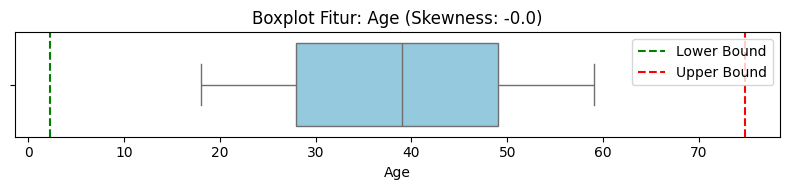

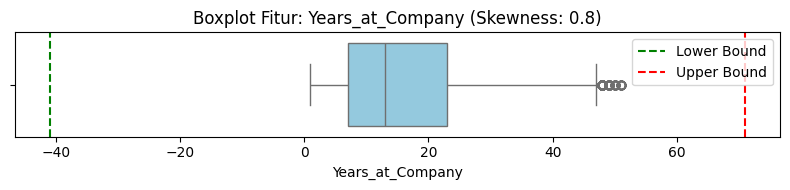

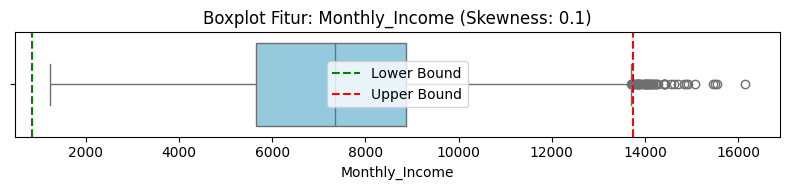

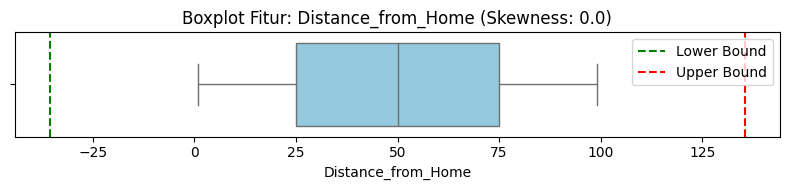

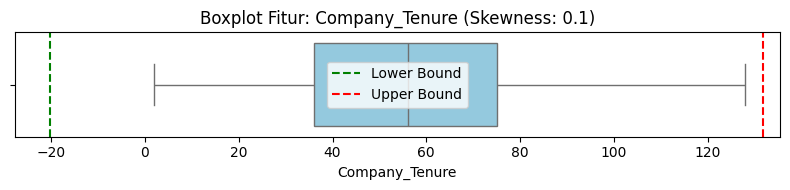

,column,Skewness Value,Distribusi,lower_boundary,upper_boundary,percentage_total_outlier (%)
0,Age,-0.0,normal,2.25,74.82,0.000000
1,Years_at_Company,0.8,skewed,-41.00,71.00,0.000000
2,Monthly_Income,0.1,normal,846.66,13744.73,0.078862
3,Distance_from_Home,0.0,normal,-35.62,135.58,0.000000
4,Company_Tenure,0.1,normal,-20.31,131.74,0.000000


In [18]:
ep.check_outlier(X_train[num_feat])

Keseluruhan fitur numerik memiliki nilai skewness yang cukup normal kecuali pada **Years_at_Company**. Walaupun tidak ada indikasi nilai outlier, saya berasumsi bahwa fitur tersebut memiliki value yang masuk akal, karena secara logis jika melihat waktu yang paling lama bekerja seorang karyawan pada perusahaan, tidak ada pekerja yang bekerja selama 71 tahun. Maka dari itu kita dapat melakukan pengecekan berapa lama seorang karyawan bekerja pada perusahaan. Saya juga melakukan pengecekan serupa terhadap gaji maksimal yang dapat diterima oleh perusahaan pada upper boundary yang telah di tetapkan di atas. 

In [19]:
# Menyaring data dengan 'Years_at_Company' <= 71
filtered_dm1 = dm[dm['Years_at_Company'] <= 71]
filtered_dm2 = dm[dm['Monthly_Income'] <= 13744.73]

# Menampilkan 5 data teratas dengan 'Years_at_Company' terbesar
top_5_max_years = filtered_dm1.nlargest(5, 'Years_at_Company')
top_5_max_income = filtered_dm2.nlargest(5, 'Monthly_Income')

# Menampilkan hasil
display(top_5_max_years)
display(top_5_max_income)

,Age,Gender,Years_at_Company,Job_Role,Monthly_Income,Work_Life_Balance,Job_Satisfaction,Performance_Rating,Number_of_Promotions,Overtime,...,Number_of_Dependents,Job_Level,Company_Size,Company_Tenure,Remote_Work,Leadership_Opportunities,Innovation_Opportunities,Company_Reputation,Employee_Recognition,Attrition
2028,59,Female,51,Finance,9088,Fair,High,Average,0,No,...,0,Mid,Medium,58,No,No,No,Poor,High,Stayed
2769,59,Male,51,Education,3825,Poor,High,Average,1,No,...,1,Entry,Small,115,No,No,No,Excellent,Low,Stayed
3929,59,Male,51,Technology,9964,Good,Medium,Average,2,No,...,3,Mid,Small,65,No,No,No,Good,Low,Left
5526,59,Male,51,Technology,8784,Good,Low,Average,1,No,...,1,Mid,Small,116,No,No,No,Fair,Medium,Stayed
7207,59,Female,51,Education,4199,Good,Very High,High,0,No,...,3,Entry,Small,93,Yes,No,No,Fair,High,Stayed


,Age,Gender,Years_at_Company,Job_Role,Monthly_Income,Work_Life_Balance,Job_Satisfaction,Performance_Rating,Number_of_Promotions,Overtime,...,Number_of_Dependents,Job_Level,Company_Size,Company_Tenure,Remote_Work,Leadership_Opportunities,Innovation_Opportunities,Company_Reputation,Employee_Recognition,Attrition
35718,56,Female,10,Technology,13739,Good,High,Average,0,No,...,1,Entry,Medium,86,No,No,Yes,Poor,Low,Left
62155,48,Female,10,Technology,13728,Fair,Low,High,0,Yes,...,2,Entry,Small,45,No,No,No,Good,High,Left
30798,33,Female,7,Finance,13722,Good,Medium,Below Average,0,No,...,2,Entry,Medium,81,No,No,No,Poor,Medium,Left
53986,21,Female,9,Finance,13715,Fair,Low,Average,3,No,...,1,Mid,Small,87,Yes,No,No,Good,High,Stayed
64366,24,Male,2,Finance,13713,Excellent,Low,High,0,No,...,0,Entry,Medium,59,No,No,No,Good,Medium,Left


Data top 5 terhadap karyawan yang paling lama bekerja menunjukan lama bekerja karyawan selama 51 tahun. Maka dari itu, saya tidak akan melakukan handling outlier pada fitur ini.

Untuk fitur gaji, secara logis merupakan value nyata yang tidak dapat diganggu gugat. Walaupun pada saat proses EDA menunjukan tidak terlalu besar nilai korelasi terhadap Attrition, namun value menunjuan nilai yang organik. Hal ini juga dapat dijelaskan berdasarkan hasil tabulasi data di atas, dimana tidak ada data gaji melebihi nilai upper boundary. 

Untuk itu, dikarenakan saya tidak melakukan handling terhadap data outlier, selanjutnya proses scaling akan menggunakan **RobustScaler** agar mencegah data dengan persentase skewness tinggi dapat teridentifikasi dengan baik pada proses modeling. 

## **VII. Feature Selection**

Memilih fitur yang memiliki korelasi kuat antara fitur dengan target (Attrition).


Analisis Korelasi terhadap target ===> 'Attrition'

=== Hasil Point-Biserial Correlation ===
                Feature   r_pb   p_value Significance
4    Distance_from_Home  0.094  0.000000   Signifikan
2        Monthly_Income -0.011  0.003533   Signifikan
6        Company_Tenure -0.029  0.000000   Signifikan
0                   Age -0.051  0.000000   Signifikan
1      Years_at_Company -0.065  0.000000   Signifikan
5  Number_of_Dependents -0.075  0.000000   Signifikan
3  Number_of_Promotions -0.081  0.000000   Signifikan

H0: Tidak ada hubungan antara Attrition dan Age.
H1: Ada hubungan antara Attrition dan Age.

H0: Tidak ada hubungan antara Attrition dan Years_at_Company.
H1: Ada hubungan antara Attrition dan Years_at_Company.

H0: Tidak ada hubungan antara Attrition dan Monthly_Income.
H1: Ada hubungan antara Attrition dan Monthly_Income.

H0: Tidak ada hubungan antara Attrition dan Number_of_Promotions.
H1: Ada hubungan antara Attrition dan Number_of_Promotions.

H0: Tidak ada hubun

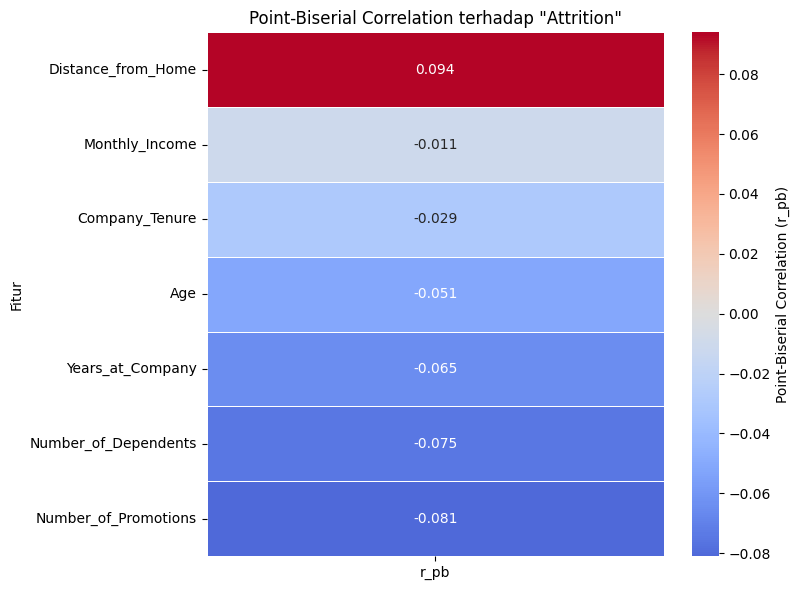


=== Hasil Chi-Square Analysis ===
                     Feature      Chi2       p_value      Significance
8                  Job_Level  7496.507  0.000000e+00        Signifikan
7             Marital_Status  6046.960  0.000000e+00        Signifikan
10               Remote_Work  3643.737  0.000000e+00        Signifikan
2          Work_Life_Balance  2912.497  0.000000e+00        Signifikan
13        Company_Reputation   887.588  0.000000e+00        Signifikan
6            Education_Level   859.317  0.000000e+00        Signifikan
0                     Gender   754.100  0.000000e+00        Signifikan
3           Job_Satisfaction   388.237  0.000000e+00        Signifikan
4         Performance_Rating   257.107  0.000000e+00        Signifikan
5                   Overtime   233.545  0.000000e+00        Signifikan
9               Company_Size    61.624  0.000000e+00        Signifikan
12  Innovation_Opportunities    34.475  4.300000e-09        Signifikan
1                   Job_Role    14.778  5.

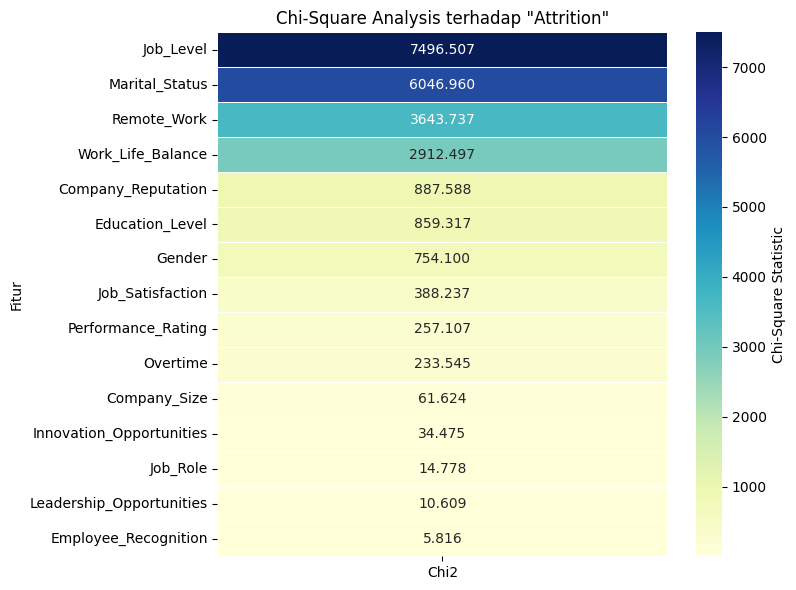

In [20]:
corr = dm.copy()
corr['Attrition'] = corr['Attrition'].map({'Left': 1, 'Stayed': 0})
ep.correlation_analysis_binary(corr, 'Attrition')

Fitur **Employee_Recognition** menunjukan nilai korelasi Chi-Square yang relatif rendah sebesar **5.8** dan tidak menunjukan signifikansi terhadap target (Attrition). Maka dari itu, **fitur ini tidak perlu dimasukkan** dalam proses modeling. Dengan mengeliminasi fitur yang tidak memberikan kontribusi berarti, model dapat lebih fokus pada fitur yang memiliki hubungan yang lebih kuat dengan attrition, sehingga meningkatkan akurasi dan efisiensi terhadap prediksi attrition karyawan. 

Mendefinisikan ulang format penulisan simbol kategori **Education_Level** agar dapat terbaca oleh model.

In [21]:
education_map = {
    'High School': 'High School',
    'Associate Degree': 'Associate Degree',
    'Bachelor’s Degree': "Bachelor's Degree",  # Pastikan untuk mengganti tanda kutip sesuai dengan format yang diinginkan
    'Master’s Degree': "Master's Degree",     # Pastikan untuk mengganti tanda kutip sesuai dengan format yang diinginkan
    'PhD': 'PhD'}

X_train['Education_Level'] = X_train['Education_Level'].map(education_map)
X_test['Education_Level'] = X_test['Education_Level'].map(education_map)

Mendefinisikan secara khsusus fitur kateogori yang akan masuk proses encoder. Saya menggunakan onehot dan ordinal encoder dalam proses encoding. Saya juga mendefinisikan kembali data ordinal agar sesuai dengan konteks dataset.

In [22]:
onehot = [
    'Gender',
    'Job_Role',
    'Marital_Status',
    'Overtime',
    'Remote_Work',
    'Leadership_Opportunities',
    'Innovation_Opportunities'
]

ordinal = [
    "Work_Life_Balance",
    "Education_Level",
    "Job_Level",
    "Company_Size",
    "Company_Reputation",
    "Performance_Rating",
    "Job_Satisfaction"
]

ordinal_categories = [
    ["Poor", "Fair", "Good", "Excellent"],  # Work_Life_Balance
    ["High School", "Associate Degree", "Bachelor's Degree", "Master's Degree", "PhD"],  # Education_Level
    ["Entry", "Mid", "Senior"],  # Job_Level
    ["Small", "Medium", "Large"],  # Company_Size
    ["Poor", "Fair", "Good", "Excellent"],  # Company_Reputation
    ["Low", "Below Average", "Average", "High"],  # Performance_Rating
    ["Low", "Medium", "High", "Very High"]  # Job_Satisfaction
]

## **VII. Pipeline**

Mendefinisikan class yang akan telah ditentukan ke dalam Pipeline agar proses tranformasi lebih ringkas secara otomatis dan reusable. Pipeline juga dapat mencegah data leakage agar proses analisa lebih mudah dilakukan tanpa mengubah data sepenuhnya.

In [23]:
# Definisikan pipeline untuk numerikal kolom dataset 2
num_pipe = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=5)),
    ('scaler', RobustScaler())
])

# Definisikan pipeline untuk kateogrikal kolom dataset 2
cat_pipe_ordinal = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(categories=ordinal_categories))
])

cat_pipe_onehot = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder())
])

# Pipeline untuk preprocessing dataset 2
preprocess = ColumnTransformer(transformers=[
    ('numerical', num_pipe, num_feat),
    ('categorical_ordinal', cat_pipe_ordinal, ordinal),
    ('categorical_onehot', cat_pipe_onehot, onehot),
    ('passthrough', 'passthrough', passt) 
])

Pada tahapan tranformasi data, terdapat empat hal yang terdefinisikan:
1. Fitur numerik menggunakan **RobustScaler** agar value dengan nilai ekstrem dapat terdefinsisikan lebih baik.
2. Fitur kategorikal menggunakan **Ordinal Encoder** dikarenakan value merupakan satuan besaran frekuensi.
3. Fitur kategorikal menggunakan **One-Hot Encoder** dikarenakan value bersifat unik dan memiliki value yang sama besarannya pada tiap elemen.
4. Fitur **passthrough** yang tidak melalui proses transformasi karena datanya sudah ter-encode secara numerik dan ordinal.

# **F. MODELING PART I - BEST MODEL**
___
Melakukan proses modeling dengan **lima algoritma klasifikasi**. Pada tahap ini, data yang telah ditransformasi pada pipeline akan dilakukan proses pelatihan menggunakan cross-validation pada setiap model algoritma, dengan menggunakan metrik *recall* untuk mengevaluasi model. Nilai *recall* terbaik pada salah satu model akan dipilih untuk dikembangkan kembali pada tahapan hyperparameter tuning.

## **I. MODEL DEFINITION**
___
Pipeline untuk menyederhanakan proses **model definition** berdasarkan hasil preprocessing sebelumnya. Saya menggunakan algoritma *classifier* KNN, SVM, Decision Tree, Random Forest, dan Gradient Boosting untuk melakukan pemodelan.

In [24]:
# Mendefinisikan model langsung
random_state = 42
models = {
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(random_state=random_state),
    'Decision Tree': DecisionTreeClassifier(random_state=random_state),
    'Random Forest': RandomForestClassifier(random_state=random_state),
    'Boosting': GradientBoostingClassifier(random_state=random_state)
}

1. K-Nearest Neighbors (KNN)
- **Penjelasan**: KNN mengklasifikasikan karyawan sebagai "Stayed" atau "Left" berdasarkan kedekatannya dengan karyawan lain yang memiliki atribut serupa (misalnya, usia, jabatan, pengalaman kerja, dll).
- **Kelebihan**: 
  - Mudah diterapkan dan dipahami.
  - Tidak memerlukan pelatihan eksplisit, cukup data.
  - Cocok untuk dataset kecil dengan jumlah fitur terbatas.
- **Kekurangan**: 
  - Memerlukan banyak memori dan komputasi untuk dataset besar.
  - Sensitif terhadap fitur yang tidak ternormalisasi. Misalnya, fitur seperti *salary* atau *years at company* harus distandarisasi agar model bekerja efektif.
- **Aplikasi di Dataset Attrition**: KNN dapat digunakan untuk mengidentifikasi karyawan yang mirip dengan mereka yang sudah meninggalkan perusahaan, dan memprediksi kemungkinan mereka untuk keluar berdasarkan kedekatannya dengan data historis.

2. Support Vector Machine (SVM)
- **Penjelasan**: SVM berusaha menemukan garis pemisah (hyperplane) yang membagi karyawan yang meninggalkan perusahaan dengan mereka yang bertahan, dengan margin terbesar antara dua kelas.
- **Kelebihan**:
  - SVM bekerja sangat baik pada data yang memiliki dimensi tinggi.
  - Efektif untuk klasifikasi biner seperti "Left" atau "Stayed".
  - Bisa menangani kasus non-linear dengan menggunakan kernel.
- **Kekurangan**:
  - Memerlukan tuning parameter (seperti *C* dan *gamma*) yang hati-hati agar tidak overfit.
  - Pelatihan yang lebih lambat pada dataset besar dengan banyak fitur.
- **Aplikasi di Dataset Attrition**: SVM dapat digunakan untuk memisahkan karyawan yang keluar dari yang bertahan berdasarkan fitur-fitur seperti usia, gaji, dan jumlah promosi yang diterima, dengan mencari margin pemisah terbaik.

3. Decision Tree
- **Penjelasan**: Decision Tree membangun pohon keputusan yang membagi dataset berdasarkan fitur untuk memprediksi kelas "Left" atau "Stayed". Setiap cabang dalam pohon menunjukkan keputusan berdasarkan fitur (misalnya, "Apakah gaji lebih dari 10 juta?").
- **Kelebihan**:
  - Mudah diinterpretasi dan divisualisasikan.
  - Dapat menangani data numerik dan kategorikal tanpa memerlukan pra-pemrosesan.
- **Kekurangan**:
  - Rentan terhadap overfitting jika pohon terlalu dalam.
  - Kinerja buruk pada data yang sangat bising atau memiliki banyak noise.
- **Aplikasi di Dataset Attrition**: Decision Tree membantu untuk mengetahui faktor-faktor utama yang mempengaruhi keputusan karyawan untuk keluar, misalnya, apakah promosi atau gaji yang lebih tinggi dapat mengurangi tingkat *attrition*.

4. Random Forest
- **Penjelasan**: Random Forest adalah ensemble dari banyak pohon keputusan yang dibangun secara acak. Setiap pohon memberikan prediksi, dan hasil akhirnya adalah mayoritas dari prediksi pohon-pohon tersebut.
- **Kelebihan**:
  - Mengurangi overfitting yang sering terjadi pada Decision Tree.
  - Dapat menangani data hilang dengan baik dan memiliki akurasi tinggi.
  - Robust terhadap data yang tidak seimbang.
- **Kekurangan**:
  - Model yang lebih kompleks dan sulit diinterpretasi.
  - Waktu pelatihan lebih lama, terutama untuk dataset besar.
- **Aplikasi di Dataset Attrition**: Random Forest dapat digunakan untuk memahami berbagai faktor yang memengaruhi keputusan karyawan untuk tetap tinggal atau keluar, dengan memberikan bobot lebih pada fitur yang lebih relevan untuk prediksi.

5. Gradient Boosting
- **Penjelasan**: Gradient Boosting adalah teknik ensemble yang membangun model prediksi secara bertahap, di mana setiap model baru berfokus pada kesalahan yang dibuat oleh model sebelumnya.
- **Kelebihan**:
  - Akurat dan dapat menghasilkan hasil yang lebih baik dengan dataset besar dan kompleks.
  - Sangat efektif dalam menangani hubungan non-linear antara fitur.
- **Kekurangan**:
  - Rentan terhadap overfitting jika tidak diatur dengan benar (misalnya, jumlah pohon atau kedalaman pohon).
  - Proses pelatihan yang lebih lambat.
- **Aplikasi di Dataset Attrition**: Gradient Boosting dapat digunakan untuk meningkatkan akurasi prediksi *attrition*, dengan memperbaiki kesalahan yang dibuat pada langkah sebelumnya dan memberikan hasil yang lebih tajam.

6. Pengaturan `random_state=42`
- **Penjelasan**: Parameter `random_state` memastikan bahwa hasil eksperimen yang menggunakan model-model ini dapat direproduksi dengan cara yang sama setiap kali kode dijalankan. Ini sangat penting dalam eksperimen berbasis data, untuk menjaga konsistensi dalam hasil dan membuat eksperimen lebih dapat dipertanggungjawabkan.
- **Aplikasi di Dataset Attrition**: Menggunakan `random_state=42` memastikan bahwa hasil prediksi pada data training dan testing konsisten, sehingga kita bisa membandingkan kinerja model secara objektif pada setiap percobaan.



## **II. MODEL TRAINING**
___
Melakukan **model training** pada dataset pelatihan menggunakan cross-validation untuk memastikan model tidak hanya bekerja baik pada data pelatihan, tetapi juga dapat menggeneralisasi dengan baik pada data baru. Selain itu, penggunaan cross-validation dapat memaksimalkan penggunaan data untuk mengurangi overfitting agar memastikan hasil metrik tertentu sudah optimal sebelum dimaksimalkan pada proses pelatihan data train dan testing atau hyperparameter tuning.

In [25]:
import warnings

# Mengabaikan semua peringatan
warnings.filterwarnings('ignore')

# Dictionary untuk menyimpan hasil pelatihan
pipelines = {}

# List untuk menyimpan hasil cv_scores
cv_scores_list = []

results = []

# Looping untuk melatih setiap model
for model_name, model in models.items():
    # Pipeline untuk setiap model
    pipeline = Pipeline([
        ('preprocess', preprocess),  # Proses preprocessing yang sudah disiapkan
        ('model', model)
    ])
    
    # Cross-validation untuk model
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='recall', n_jobs=-1)

    # Menyimpan pipeline yang sudah dilatih ke dalam dictionary
    pipelines[model_name] = pipeline  # Menyimpan pipeline yang dilatih
    
    # Menyimpan hasil cv_scores ke dalam list
    cv_scores_list.append(cv_scores)  # Menyimpan hasil cv_scores per model dalam list

    # Menyimpan hasil dalam objek
    model_result = {
        'Model': model_name,
        'Recall Scores': cv_scores,
        'Mean Recall': cv_scores.mean(),
        'Standard Deviation Recall': cv_scores.std(),
        'Range': (cv_scores.mean() - cv_scores.std(), cv_scores.mean() + cv_scores.std())
    }
    
    results.append(model_result)

# Mengubah hasil menjadi DataFrame
HasilCV = pd.DataFrame(results)

Proses pelatihan menggunakan cross-validation untuk mengevaluasi kinerja setiap model dengan metrik **recall**. Hasil dari cross-validation disimpan dalam list dan pipeline yang telah dilatih disimpan dalam dictionary. Setiap model dianalisis dengan menghitung skor recall, rata-rata, standar deviasi, dan rentang skor recall. Hasil akhir dari analisis model kemudian dikumpulkan dalam sebuah DataFrame HasilCV untuk analisis lebih lanjut pada tahapan model evaluation.

## **III. MODEL EVALUATION**
___
Melakukan **model evaluation** terhadap hasil modeling menggunakan cross-validation pada setiap algoritma.

In [26]:
HasilCV

,Model,Recall Scores,Mean Recall,Standard Deviation Recall,Range
0,KNN,"[0.6846289752650176, 0.6748542145255345, 0.687...",0.682923,0.004394,"(0.6785295294964676, 0.6873171127388907)"
1,SVM,"[0.7314487632508834, 0.7338752429757908, 0.731...",0.733779,0.003349,"(0.7304295491301963, 0.7371278674619047)"
2,Decision Tree,"[0.6399293286219081, 0.6464039582965189, 0.649...",0.648997,0.005471,"(0.6435259783526993, 0.6544673116753182)"
3,Random Forest,"[0.7164310954063604, 0.7160275667078989, 0.709...",0.718087,0.005788,"(0.7122996356567498, 0.7238752057572523)"
4,Boosting,"[0.738339222614841, 0.7365258879660718, 0.7367...",0.739362,0.002831,"(0.7365319181377723, 0.7421930623024033)"


Dapat kita identifikasi bahwa nilai recall paling baik terdapat pada model menggunakan **algoritma Gradient Boosting**. Nilai rata-rata recall pada algoritma boosting menunjukan hasil yang paling baik sebesar **73,8%**, dengan persebaran **data lebih stabil** dengan nilai standar deviasi yang juga kecil, sebesar 0.003. Hasil model menggunakan algoritma Boosting mirip dengan SVM dengan selisih **0.007%** pada rata-rata recall, dan juga dengan selisih standar deviasi sebsear 0.0003.

Berdasarkan hasil evaluasi cross-validation, saya akan melakukan hyperparameter tuning terhadap model menggunakan algoritma Gradient Boosting untuk mengoptimalkan kinerja model dan memaksimalkan hasil pengujian. Dengan melakukan penyesuaian pada hyperparameter, diharapkan model dapat memberikan prediksi *recall* yang lebih akurat dan generalisasi yang lebih baik.

# **G. MODELING PART II - HYPERPARAMETER TUNING**
___
Menggunakan model dengan algoritma **Gradient Boosting** berdasarkan hasil evaluasi cross-validation, untuk kemudian dilakukan proses hyperparameter tuning agar dapat  mengoptimalkan kinerja model dan meningkatkan akurasi prediksi. Hyperparameter tuning  bertujuan untuk menemukan kombinasi hyperparameter yang paling efektif bagi model, sehingga dapat memberikan hasil yang lebih baik pada data yang belum terlihat.

Mendefinisikann pipeline pada algoritma yang digunakan.

In [27]:
pipelines['Boosting']

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['Age', 'Years_at_Company',
                                                   'Monthly_Income',
                                                   'Distance_from_Home',
                                                   'Company_Tenure']),
                                                 ('categorical_ordinal',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder(catego...
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  ['Gender', 'Job_Role',
                                                   'Marital_Status', 'Overtime',
                                                   'Remote_Work',
                                                   'Leadership_Opportunities',
                                                   'Innovation_Opportunities']),
                                                 ('passthrough', 'passthrough',
                                                  ['Number_of_Promotions',
                                                   'Number_of_Dependents'])])),
                ('model', GradientBoostingClassifier(random_state=42))])

Menggunakan parameter default dari proses cross-validation sebelumnya, dengan penambahan parameter baru.

In [28]:
# Definisikan parameter distribusi untuk RandomizedSearchCV
param_dist = {
    'model__n_estimators': [50, 100, 150, 200, 250],
    'model__learning_rate': uniform(0.01, 0.1),  # Distribusi acak untuk learning rate
    'model__max_depth': [5, 7, 10, 12],  # Ubah sesuai dengan max_depth yang lebih besar dari default 3
    'model__subsample': [0.8, 0.9, 1.0],  # Ubah subsample sesuai preferensi
    'model__min_samples_split': [2, 5, 10],  # Ubah sesuai dengan nilai min_samples_split default
    'model__min_samples_leaf': [1, 2, 4],  # Ubah sesuai dengan nilai min_samples_leaf default
    'model__max_features': ['sqrt', 'log2', None],  # Ubah max_features yang lebih fleksibel
    'model__loss': ['log_loss'],  # Loss default
    'model__criterion': ['friedman_mse'],  # Default criterion
    'model__min_weight_fraction_leaf': [0.0],  # Default value untuk min_weight_fraction_leaf
    'model__min_impurity_decrease': [0.0],  # Default value untuk min_impurity_decrease
    'model__warm_start': [False],  # Default warm_start
    'model__validation_fraction': [0.1],  # Default validation_fraction
    'model__n_iter_no_change': [None],  # Default n_iter_no_change
    'model__tol': [0.0001],  # Default tol
    'model__ccp_alpha': [0.0]  # Default ccp_alpha
}

# Gunakan RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=pipelines['Boosting'],
                                   param_distributions=param_dist,
                                   n_iter=100, cv=5, n_jobs=-1, verbose=2, random_state=42)

# Latih model dengan RandomizedSearchCV
random_search.fit(X_train, y_train)

### JANGAN DIAPA-APAIN
# Tampilkan parameter terbaik yang ditemukan
print("Best parameters found: ", random_search.best_params_)
### JANGAN DIAPA-APAIN


# Tampilkan recall pada data uji dengan parameter terbaik
best_model = random_search.best_estimator_

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found:  {'model__ccp_alpha': 0.0, 'model__criterion': 'friedman_mse', 'model__learning_rate': np.float64(0.07981617140197451), 'model__loss': 'log_loss', 'model__max_depth': 5, 'model__max_features': 'sqrt', 'model__min_impurity_decrease': 0.0, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__min_weight_fraction_leaf': 0.0, 'model__n_estimators': 200, 'model__n_iter_no_change': None, 'model__subsample': 0.8, 'model__tol': 0.0001, 'model__validation_fraction': 0.1, 'model__warm_start': False}


Terdapat beberapa poin terhadap penggunaan tiap parameter dan object pada proses Hyperparameter Tuning:

- Parameter distribusi untuk **RandomizedSearchCV** didefinisikan dalam param_dist, yang mencakup berbagai nilai untuk hyperparameter seperti n_estimators, learning_rate, max_depth, dan subsample. RandomizedSearchCV digunakan untuk mencari kombinasi hyperparameter terbaik dengan melakukan pencarian acak. Paremeter n_iter=100, pencarian dilakukan sebanyak 100 iterasi, menggunakan 5-fold cross-validation sebanyak 5 seperti sebelumnya untuk evaluasi model. Parameter n_jobs=-1 memastikan bahwa semua inti CPU yang tersedia digunakan untuk mempercepat pencarian, sedangkan random_state=42 menjamin hasil yang konsisten setiap kali kode dijalankan.

- Proses pelatihan model menggunakan **random_search.fit** pada data latih di data fitur dan data target. Hal ini bertujuan untuk menemukan parameter terbaik berdasarkan data pelatihan. Setelah pelatihan selesai, random_search.best_params_ menampilkan hyperparameter terbaik yang ditemukan selama pencarian.

- Model terbaik, yang terlatih dengan parameter terbaik tersebut, disimpan dalam **best_model** untuk digunakan lebih lanjut. Hasil objek menampilkan parameter terbaik dan penyimpanan model terbaik setelah dilatih dengan hyperparameter paling optimal.

# **H. EVALUATION MODEL AFTER HYPERPARAMETER TUNING**
___
Mengevaluasi model yang telah dilakukan hyperparameter tuning menggunakan classification report yang berfokus pada metrik **recall**. Selain itu akan menampilkan Confusion Matrix untuk menilai performa model dalam mengklasifikasikan kelas positif dan negatif untuk menilai metrik **recall** secara spesifik.

=============== Classification Report ===============

Train Data:
              precision    recall  f1-score   support

           0       0.77      0.78      0.77     31302
           1       0.75      0.74      0.75     28296

    accuracy                           0.76     59598
   macro avg       0.76      0.76      0.76     59598
weighted avg       0.76      0.76      0.76     59598

------------------------------------------------------
Test Data:
              precision    recall  f1-score   support

           0       0.77      0.78      0.77      7826
           1       0.75      0.74      0.74      7074

    accuracy                           0.76     14900
   macro avg       0.76      0.76      0.76     14900
weighted avg       0.76      0.76      0.76     14900



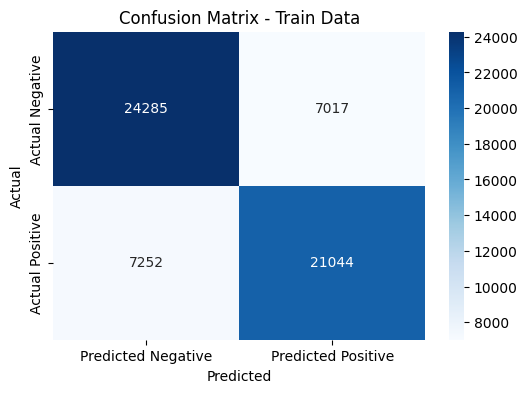

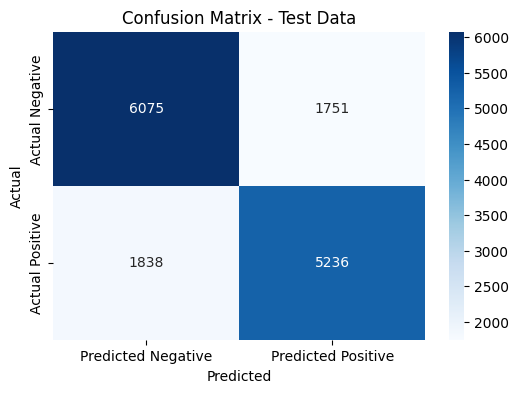

In [34]:
# Contoh penggunaan fungsi untuk data latih dan data uji
Boosting = pipelines['Boosting'].fit(X_train, y_train)
ep.evaluate_model_class_report(Boosting, X_train, y_train, X_test, y_test)

1. Recall yang Konsisten:

 	Model menunjukkan recall yang cukup baik dan konsisten pada kedua dataset, yaitu 0.78 pada data latih dan 0.77 pada data uji untuk kelas 0 (negatif), serta 0.74 pada kedua dataset untuk kelas 1 (positif). Ini menunjukkan model cukup baik dalam menangkap kelas positif, meskipun ada sedikit penurunan di data uji.

2. F1-Score yang Seimbang:

 	F1-score pada data latih dan uji relatif seimbang, dengan 0.77 di data latih dan 0.74 di data uji untuk kelas 1, yang menunjukkan keseimbangan yang baik antara precision dan recall. Model ini menghindari trade-off yang besar antara kedua metrik tersebut.

3. Akurasi yang Stabil:

	Akurasi model pada kedua dataset adalah 0.76, yang menunjukkan bahwa model mampu mengklasifikasikan dengan cukup baik pada kedua data latih dan uji. Meskipun tidak sangat tinggi, akurasi ini sebanding dengan nilai recall dan f1-score yang solid, mengindikasikan bahwa model tidak hanya akurat tetapi juga efektif dalam mengidentifikasi kelas minoritas.

=============== Classification Report ===============

Train Data:
              precision    recall  f1-score   support

           0       0.78      0.78      0.78     31302
           1       0.76      0.76      0.76     28296

    accuracy                           0.77     59598
   macro avg       0.77      0.77      0.77     59598
weighted avg       0.77      0.77      0.77     59598

------------------------------------------------------
Test Data:
              precision    recall  f1-score   support

           0       0.77      0.77      0.77      7826
           1       0.75      0.74      0.75      7074

    accuracy                           0.76     14900
   macro avg       0.76      0.76      0.76     14900
weighted avg       0.76      0.76      0.76     14900



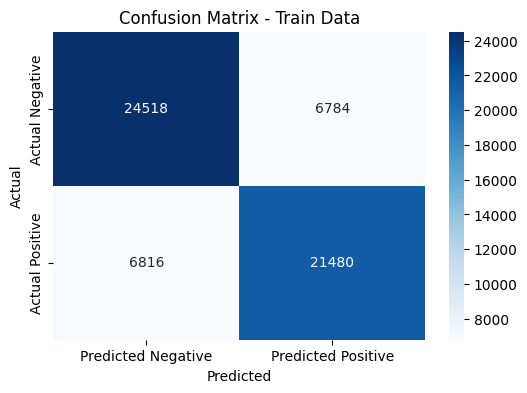

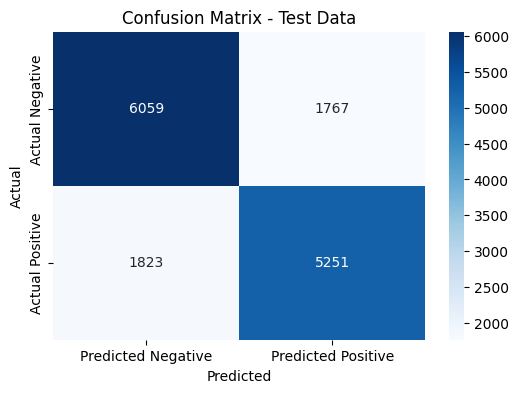

In [35]:
# Contoh penggunaan fungsi untuk data latih dan data uji
ep.evaluate_model_class_report(best_model, X_train, y_train, X_test, y_test)

1. Recall yang Konsisten:

	Model menunjukkan recall yang cukup stabil pada kedua dataset: 0.78 di data latih dan 0.77 di data uji untuk kelas 0 (negatif), serta 0.76 di data latih dan 0.75 di data uji untuk kelas 1 (positif). Ini menunjukkan bahwa model dapat menangkap dengan baik kedua kelas, meskipun ada sedikit penurunan pada data uji.

2. F1-Score yang Seimbang:

	F1-score model juga cukup seimbang, dengan nilai 0.78 di data latih dan 0.77 di data uji untuk kelas 0, serta 0.76 di data latih dan 0.75 di data uji untuk kelas 1. Ini menunjukkan keseimbangan yang baik antara precision dan recall pada kedua dataset.

3. Akurasi yang Stabil:

	Akurasi model sedikit menurun antara data latih dan uji: 0.77 pada data latih dan 0.76 pada data uji. Meskipun ada penurunan kecil, model tetap cukup baik dalam klasifikasi dengan tingkat akurasi yang mendekati 0.77, menunjukkan bahwa model tidak mengalami overfitting atau underfitting yang signifikan.

**Kesimpulan Model**

1. **Sebelum Hyperparameter Tuning (Train Data)**:
   - **Recall** untuk kelas 0 (negatif) adalah **0.78** dan untuk kelas 1 (positif) adalah **0.76**. Meskipun **recall** cukup baik, ada sedikit perbedaan antara kedua kelas, yang menunjukkan bahwa model mungkin lebih cenderung untuk memprediksi kelas negatif.
   - **F1-score** di data latih adalah **0.78** untuk kelas 0 dan **0.76** untuk kelas 1, menunjukkan keseimbangan yang baik antara precision dan recall.
   - **Akurasi** adalah **0.77**, yang menunjukkan performa yang cukup baik tetapi masih ada ruang untuk perbaikan.

2. **Setelah Hyperparameter Tuning (Test Data)**:
   - **Recall** untuk kelas 0 (negatif) adalah **0.77** dan untuk kelas 1 (positif) adalah **0.75**, sedikit menurun dibandingkan dengan data latih, tetapi tetap dalam kisaran yang dapat diterima.
   - **F1-score** pada data uji adalah **0.77** untuk kelas 0 dan **0.75** untuk kelas 1, yang menunjukkan bahwa meskipun ada penurunan sedikit, model tetap menjaga keseimbangan yang baik antara precision dan recall.
   - **Akurasi** adalah **0.76**, yang sedikit lebih rendah dari data latih tetapi masih menunjukkan performa yang baik.

**Apakah Model Good Fit?**
- Model yang telah **dituning** menunjukkan performa yang sedikit menurun pada data uji dibandingkan dengan data latih, tetapi ini masih berada dalam kisaran yang dapat diterima. **Akurasi**, **recall**, dan **f1-score** menunjukkan bahwa model **masih cukup baik** dan tidak overfit, karena perbedaan antara data latih dan uji tidak terlalu besar.
- **Model good fit**: Model ini bisa dianggap **good fit**, karena dapat mengklasifikasikan data dengan akurasi yang baik dan menjaga keseimbangan antara recall dan f1-score. Penurunan kecil dalam **recall** dan **akurasi** antara data latih dan uji menunjukkan bahwa model tidak overfitting, dan tuning telah memberikan peningkatan yang layak.

# **I. MODEL SAVING**
___
Model saving pada model terbaik setelah dilaukan hyperparameter tuning.

In [36]:
with open('AttritionBoosting.pkl', 'wb' ) as file:
    pickle.dump(best_model, file)

# **J. MODEL INFERENCE**
___
Model inference dilakukan pada file notebook [P1M2_rafi_siregar_inference.ipynb](P1M2_rafi_siregar_inference.ipynb). Model disimpan pada file [AttritionBoosting.pkl](AttritionBoosting.pkl).

# **K. CONCLUSION**
___

Jika tujuannya adalah mengidentifikasi karyawan yang berisiko tinggi untuk berhenti bekerja, maka kita lebih memprioritaskan Recall. Ini karena Recall mengukur seberapa banyak karyawan yang benar-benar akan berhenti yang berhasil diprediksi oleh model. Dengan fokus pada Recall, kita ingin memastikan bahwa semua karyawan berisiko tinggi terdeteksi, meskipun mungkin ada beberapa kesalahan (False Positives).

Namun, jika tujuannya adalah menghindari kesalahan dalam mengidentifikasi karyawan yang tidak akan berhenti, maka Precision lebih penting. Precision mengukur seberapa banyak prediksi positif (karyawan yang diprediksi akan berhenti) yang benar-benar terbukti berhenti. Dengan fokus pada Precision, kita ingin meminimalkan jumlah karyawan yang salah diprediksi sebagai berisiko berhenti (False Positives).

Ya, F1-Score bisa menjadi pilihan yang sangat baik karena ia merupakan harmonic mean dari Precision dan Recall, sehingga memberikan keseimbangan antara keduanya.

F1-Score sangat berguna ketika:

Data tidak seimbang, yaitu jumlah karyawan yang mengalami attrition lebih sedikit dibandingkan yang tidak.

Anda ingin menghindari terlalu banyak False Positives (prediksi karyawan akan berhenti padahal tidak) dan False Negatives (prediksi karyawan tidak akan berhenti padahal sebenarnya akan berhenti), dan mencari keseimbangan antara keduanya.

F1-Score memberikan gambaran yang lebih lengkap tentang kinerja model, terutama ketika Anda tidak ingin terlalu fokus pada salah satu metrik (Precision atau Recall) saja. Jadi, jika Anda mencari metrik yang mencakup keduanya dengan adil, F1-Score adalah pilihan yang baik.

kasih 

# **L. RECOMENDATION**
___

kasih rekomendasi tambah fitur dengan melihat korelasi tiap fitur yang memiliki nilai paling tinggi.